In [3]:
import yfinance as yf

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt

In [4]:
spy_df = yf.download('SPY', start='2000-01-01', end='2023-02-11')
df = spy_df.drop(['Open','High','Low','Close','Volume'],axis=1)
df.head(10)

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
2000-01-03,95.308830
2000-01-04,91.581635
2000-01-05,91.745453
2000-01-06,90.271034
2000-01-07,95.513580
2000-01-10,95.841293
2000-01-11,94.694458
2000-01-12,93.752419
2000-01-13,95.022141


In [5]:
def getvol_standardapproach(data, frequency):
    
    """
    data:pandas dataframe or numpy array
    frequency:int, represent the sampling frequency in days
    """
    data = np.array(data)
    log_return = np.log((data[::frequency]/np.roll(data[::frequency],1))[1:])
    length_ = log_return.shape[0]
    
    mu = np.sum(log_return/length_)
    vol = np.sum(np.square(log_return-mu)/(length_-1))
    ann_sigma = np.sqrt((252*vol)/frequency)
    
    return ann_sigma

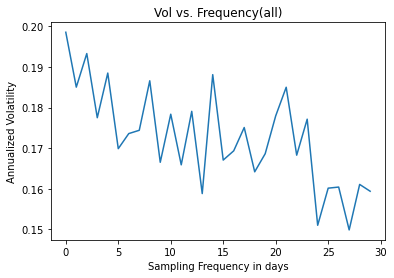

In [6]:
sigma_all = [getvol_standardapproach(df,i+1) for i in range(30)]
    
plt.title("Vol vs. Frequency(all)") 
plt.xlabel("Sampling Frequency in days") 
plt.ylabel("Annualized Volatility") 
plt.plot(sigma_all)

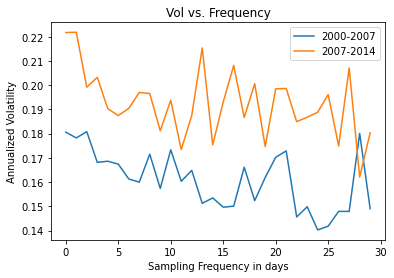

In [7]:
sigma_00_07 = [getvol_standardapproach(df['2000':'2007'],i+1) for i in range(30)]
sigma_07_14 = [getvol_standardapproach(df['2007':'2014'],i+1) for i in range(30)]
    
plt.title("Vol vs. Frequency") 
plt.xlabel("Sampling Frequency in days") 
plt.ylabel("Annualized Volatility") 
plt.plot(sigma_00_07,label = '2000-2007')
plt.plot(sigma_07_14,label = '2007-2014')
plt.legend()

In [8]:
def get_rolling_signature(data, f, window_size):
    
    """
    data:pandas dataframe or numpy array
    frequency:int, represent the sampling frequency in days
    window_size:int, represent the days in window
    """    
    data = np.array(data)
    vol_list=[getvol_standardapproach(data[i:i+window_size],frequency = f) for i in range(data.shape[0]-window_size)]
    
    return vol_list

In [9]:
mean_list = [np.mean(get_rolling_signature(df, i+1, 126)) for i in range(30)]
median_list = [np.median(get_rolling_signature(df, i+1, 126)) for i in range(30)]
first_quantile_list = [np.percentile(get_rolling_signature(df, i+1, 126), 25) for i in range(30)]
third_quantile_list = [np.percentile(get_rolling_signature(df, i+1, 126), 75) for i in range(30)]

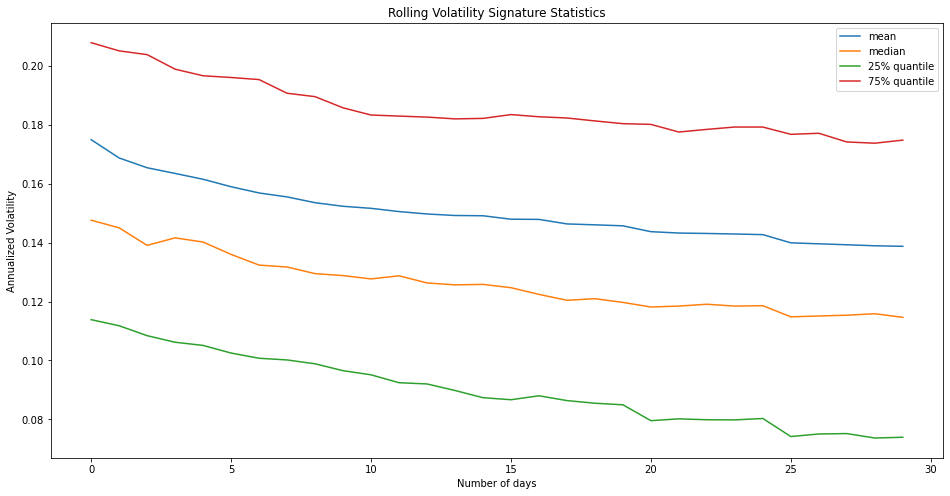

In [10]:
plt.figure(figsize=(16,8))
plt.title("Rolling Volatility Signature Statistics") 
plt.xlabel("Number of days") 
plt.ylabel("Annualized Volatility") 
plt.plot(mean_list,label = 'mean')
plt.plot(median_list,label = 'median')
plt.plot(first_quantile_list,label = '25% quantile')
plt.plot(third_quantile_list,label = '75% quantile')

plt.legend()

In [11]:
def getvol_high_frequency(data, frequency):
    
    """
    data:pandas dataframe or numpy array
    frequency:int, represent the sampling frequency in seconds
    """
    data = np.array(data)
    
    log_return = np.log((data[::frequency]/np.roll(data[::frequency],1))[1:])
    length_ = log_return.shape[0]
    
    mu = np.sum(log_return/length_)
    vol = np.sum(np.square(log_return-mu)/(length_-1))
    ann_sigma = np.sqrt((252*vol)/frequency)
    
    return ann_sigma

In [12]:
def get_rolling_signature_high_frequency(data, f, window_size):
    
    """
    data:pandas dataframe or numpy array
    frequency:int, represent the sampling frequency in seconds
    window_size:int, represent the days in window
    """    
    data = np.array(data)
    vol_list=[getvol_standardapproach(data[i:i+window_size],frequency = f) for i in range(data.shape[0]-window_size)]
    
    return vol_list